## Algoritmos Genéticos ----------------------------------

* Técnicas de **optimización metaherísticas**, **estocásticas** o **probabilísticas** (Holland-1962-1965-1992 y Goldberg-2006)
* **Computacionalmente intensivos** de ahí el tiempo que pasó desde su propuesta en 1962 hasta su aplicación en problemas de ingeniería reales (1992)
* Realiza una **búsqueda guiada** a partir de un conjunto inicial de posibles soluciones (**Población Inicial**) y va **evolucionando** a mejor en cada iteración del algoritmo (**generaciones**)
* Normalmente, las últimas generaciones contienen la mejor o las mejores soluciones al problema de optimización
* Cada **posible solución** se conoce como **individuo** y cada individuo **codifica** las variables independientes del problema de optimización. Estas variables representan los **genes** de la cadena **cromosomática** que representa a cada individuo
* Las **modificaciones genéticas** que hacen que los individuos se **adapten** mejor al medio, tienen **mayor probabilidad de perdurar en el tiempo**
* La **adaptación al medio** se realiza mediante la **función que queremos optimizar** (**función objetivo**, **función de evaluación** o **fitness function**). Llamaremos **fitness** a la **calidad** o **desempeño** de un individuo
* Pasar de un problema de **maximización** a uno de **minimización** es tan sencillo como **multiplicar** por **-1** el **resultado de la función objetivo**
* En cada iteración, **nuevos individuos** (**descendientes** u **offsprings**) son creados mediante **operaciones genéticas** dando lugar a nuevas poblaciones
* Operaciones genéticas: **Selección**, **Cruce** y **Mutación**


### ¿Porqué decidimos usar una **optimización metaheurística** (**no** garantizan la obtención de una solución óptima) en lugar de un **método exacto** (garantizan la obtención de una solución óptima)?

No es una pregunta fácil de responder. Se usa para problemas de **gran complejidad**:
* Gran **cantidad** de **variables**
* Gran **complejidad** de las **ecuaciones**
* Nos llegamos a preguntar si el problema tendrá solución

No siempre podemos encontrar un método exacto que permita resolver nuestro problema, y si lo hay, es posible que su **aplicación** **no** sea **viable** para un problema de cierta complejidad por el **tiempo** de **resolución** o **consumo** de **recursos**. (Una búsqueda extensiva para un problema combinatorio de algunos cientos de variables, puede tardar meses o años)

Además, las estratégias de **resolución analíticas**, como los **métodos basados en el gradiente** , pueden **converger a óptimos locales** y no alcanzar el óptimo global del problema

### Cómo decidir la estrategia para abordar un problema
1. **Cómo de grande es mi problema**: Estimar tiempo de una búsqueda **extensiva** a partir del tiempo necesario para evaluar una única solución
2. **Que rapidez necesito para obtener una solución**: A veces horas es aceptable, pero no meses...
3. **Cuantas restricciones hay**: A más restricciones, menos probable es que nos interese un método analítico exacto
4. **Precisión que necesito en los resultados**: A veces es preferible rapidez y aproximación antes que lentitud y total precisión.

### Qué necesitamos para resolver Algoritmos Genéticos con Python

Utilizaremos la librería de Python **`deap`** [Documentación de deap](https://deap.readthedocs.io/en/master/)

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 12.1 MB/s 


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Necesitamos también la librería de Python de **multiprocesamiento** (mecanismo de **paralelización**) **`SCOOP`** [Enlace al GitHub de SCOOP](https://github.com/soravux/scoop)

Paralelizables : todo el algoritmo, se pueden hacer muchas cosas a la vez.

In [5]:
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 615 kB 14.8 MB/s 
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78119 sha256=1c114fd160600b1097aca08c51178e652c753268c2346afd12a9f48f94977192
  Stored in directory: /root/.cache/pip/wheels/06/d1/b8/b4495d80f3aa67a67b8d19a900892d4f6af3c6d1bdd3cd015c
Successfully built scoop


### RESOLUCIÓN DE UN PROBLEMA SENCILLO ---------------------------------------

Se desea encontrar el **máximo** de la función:
$$f(x,y) = \sqrt{x^2 + y^2}$$
En el dominio $$\{x,y\} \in [-100,100]$$

En este problema, la cadena cromosomática estaría formada por dos genes (cromosomas), que, al confinarse en forma de lista, quedaría como
Uno para la x y otro para la y

 $$[x_i, y_i]$$ con $$i = 1, 2, ... , n$$

para el cruce, tengo xp1 yp1 / xp2 yp2
los hijos pueden ser xp1 yp2 / xp2 yp1

Por ejemplo, tenemos p1=[100,-100] y p2= [50,78]
Por lo que los hijos serían [100,78] y [50,-100]

La **población** del algoritmo **no cambia de tamaño** a lo largo de las generaciones, con lo que **n** será **constante**

La población inicial se **elige de forma aleatoria** porque queremos **diversidad genética**

In [6]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

#### NOTA SOBRE NÚMEROS ALEATORIOS --------------------------

Queremos generar números aleatorios entre -100 y 100 (sin incluir a estos). Podemos usar el módulo nativo random de generación de números pseudoaleatorios [Documentación librería random](https://docs.python.org/3/library/random.html) y `numpy.random`(para generación de vectores psudoaleatorios) [Documentación numpy.random](https://docs.scipy.org/doc/numpy-1.16.1/reference/routines.random.html). Recordad que los números totalmente aleatorios no existen en programación.

Utilizamos, además, el método `uniform`: [Documentación método uniform](https://docs.python.org/3.6/library/random.html)

In [7]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla, 
# la función generará los mismos número aleatorios
random.seed(0)
# Generamos los números pseudo-aleatorios en 2 list comprenhension
# para encapsular todos los datos en las listas x e y
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


Otra posibilidad es generar dos vectores de diez valores comprendidos entre -100 y 100, con una forma (1,10) (1 fila y 10 columnas). Serían dos vectores de tipo fila con diez valores

In [8]:
import numpy as np
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla
# Numpy genera directamente los vectores
z = np.random.uniform(-100, 100, 10).reshape(1, 10) 
t = np.random.uniform(-100, 100, 10).reshape(1, 10) 
print('z= ', z)
print('t= ', t)

z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


Hay que tener en cuenta que las soluciones deben ser válidas y una solución sería **no válida** si alguna de las variables independientes se saliera de los **rangos establecidos**. Es común en los problemas de optimización tener restricciones en las variables, por lo que siempre tendremos que **comprobar la validez de nuestras soluciones**

#### ------------------------------------------------------------------

#### NOTA 2: ESPACIO DE BÚSQUEDA O DOMINIO DE LA SOLUCIÓN -

Sabemos que las 4 soluciones óptimas para nuestro problema de ejemplo son:

|Individuo|x|y|
|-|-|-|
|1|100|100|
|2|-100|100|
|3|100|-100|
|4|-100|-100|

Vamos a resolverlo con Algoritmo Genético como ejercício, aunque cualquier algoritmo de optimización basado en gradiente de los que vienen incluidos en el módulo `optimize` de `scipy`([módulo optimize en scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)) nos valdría para obtener una solución a nuestro problema de manera sencilla, ya que nuestra función es **convexa**

Recordar que: Los AGs se deben emplear en **problemas de optimización** en los que la solución óptima **no se conozca** y ni siquiera tengamos una **aproximación** a la misma o incluso **ni siquiera se tenga la certeza** de que podamos obtenerla.

Aunque el **uso de AGs no nos da certeza de obtener la solución óptima**, si obtendremos una solución **bastante buena** y en un **tiempo razonable**. Siempre vamos a terminar con una solución al problema que **será mejor que realizar una búsqueda totalmente aleatoria** 

##### Visualicemos nuestra función

In [9]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [10]:
# Definimos la función objetivo
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    res = np.sqrt(x[0]**2 + x[1]**2)
    return res

[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [11]:
# Generamos vectores que barran todo el dominio
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
# print('x= ', x)
# print('y= ', y)

[numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

[numpy.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)

[numpy.c_](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)

In [12]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

[matplotlib.pyplot.gca](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html)

Text(0.5, 0, 'f(x,y)')

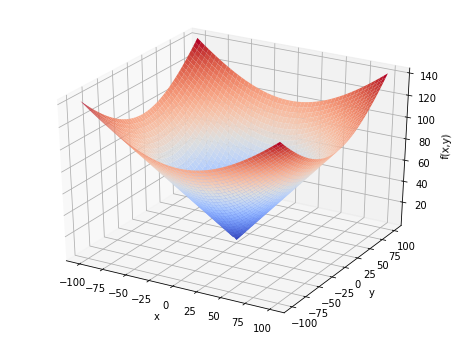

In [13]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

#### ------------------------------------------------------------------

A partir de ahora veremos los siguientes pasos:
1. Definición del problema y generación de la población inicial
- 1.1 Creación del problema
- 1.2 Creación de la plantilla del individuo
- 1.3 Crear individuos aleatorios y población inicial
2. Función objetivo y operadores genéticos
- 2.1 Función objetivo
3. Incorporación de los operadores genéticos
4. Últimos pasos: Algortimo Genético como caja negra
- 4.1 Configuración algoritmo genético
- 4.2 Resultados del algoritmo genético
5. ¿Cómo conseguir resultados consistentes?
6. Convergencia del algoritmo
7. Exploración versus explotación en algoritmos genéticos
8. Código completo y lecciones aprendidas
9. Para seguir aprendiendo

#### 1. Definición del problema y generación de la población inicial

Se importan las librerías necesarias

In [14]:
import random
from deap import base
from deap import creator
from deap import tools

##### 1.1 Creación del problema

Creamos los objetos para **definir el tipo de problema de optimización** (maximizar o minimizar), con el método `create` de la clase `creator`. Crea una nueva clase llamada `name=FitnessMax` (podría ser otro), que hereda de `base=base.Fitness` y que tiene un atributo llamado `attribute=weights` que se añadirá a la clase cuando esta se cree (opcional) y que determina el tipo de problema de optimización que estamos definiendo (contiene una tupla con tantas componentes como objetivos tenga el problema y con un valor que indica si es maximización o minimización). En nuestro caso, un solo objetivo y maximización (porque 1.0 es positivo). El objeto `base.Fitness` contiene los atributos encargados de almacenar el **fitness** o desempeño de un individuo y otros [atributos de base.Fitness](https://deap.readthedocs.io/en/master/api/base.html#deap.base.Fitness), que los heredará nuestra nueva clase `FitnessMax`:
* `values`: Una tupla con los valores de **fitness** de cada uno de los objetivos de nuestro problema. Contiene, por tanto, la calidad de cada individuo en cada uno de los objetivos de nuestro problema
* `dominates`: Devuelve `True` si una solución es estrictamente peor que otra (tiene sentido en AGs de varios objetivos)
* `valid`: Indica si el **fitness** de un individuo es válido. Se usa para saber el número de individuos que se tienen que evaluar en cada iteración. Si un individuo tiene el atributo `values` vacío, el atributo `valid` será `False`.

In [15]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

 weights=(1.0,)) como es positivo, es max
 
 si fuese en negativo, sería minimizar 

 Hereda los atributos de base.Fitness

Lo que realmente hemos hecho es:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)
```

##### 1.2 Creación de la plantilla del individuo

Creamos el **tipo de individuo** (el tipo de objeto de Python o plantilla que va a contener el individuo (lista, vector, etc) 
y sus atributos. Creamos la clase `Individual` que hereda de la clase `list` [listas en Python](https://docs.python.org/3/tutorial/datastructures.html) y que contiene el atributo `fitness` inicializado con el objeto `FitnessMax`: Un individuo es una lista con un atributo que almacenará la calidad o desempeño de si mismo 

In [16]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)

# Generamos la clase Individual
class Individual(list)
  fitness = MaxFitness
```

##### 1.3 Crear individuos aleatorios y población inicial

Definición del **objeto caja de herramientas** o `Toolbox` [Toolbox](https://deap.readthedocs.io/en/master/api/base.html#toolbox) que contendrá, mediante 
**registro**, un conjunto de funciones utilizadas por el algoritmo durante 
su ejecución, como suelen ser:
* Función para **crear los individuos** de forma **aleatoria**
* Función para **crear la población**
* **Operadores genéticos** (selección, cruce y mutación)
* Función **objetivo**

In [17]:
toolbox = base.Toolbox()

En el `Toolbox` registraremos funciones necesarias para ejecutar el AG, a través del método `register` de la clase `base.Toolbox` que tiene los atributos:
* `alias`: El nombre con el que registramos la función en el `Toolbox`
* `function`: La función que estamos registrando
* `argument`: Los argumentos que se pasan a la función

Registramos la función `attr_uniform` (Que será un método de la clase `toolbox`) que permite **crear individuos aleatorios** desarrollando una función (usaremos `random.uniform`) que nos permita generar un valor aleatorio para cada variable independiente (cada gen del comosoma), esto es, cada una de las posiciones de la lista con valores sujetos a las restricciones de nuestro problema (-100, 100)

In [18]:
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [19]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

Si se quiere detalle de como hace esto Python, investigar el método `partial` del módulo nativo `functools`: [functools](https://docs.python.org/3/library/functools.html) 

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
import random

# Definimos la función correspondiente
def funcion(a=-100, b=100):
  return random.uniform(a,b)

# Definimos la clase
class Toolbox(object)
  attr_uniform = function
```

Creamos el individuo completo llamando a la función que genera cada uno de los individuos tantas veces como variables independientes tengamos. Eso lo hacemos registrando la función `individual` que, a su vez, llama a la función `tools.initRepeat` que tiene los siguientes parámetros:
* `container`: Tipo de dato donde se almacenará el resultado del argumento `func` -> En nuestro caso, la clase `creator.individual` creada anteriormente
* `func`: Función a la que se llamará `n` veces -> En nuestro caso `toolbox.attr_uniform` creada anteriormente para crear cada gen
* `n`: Número de veces que se llamará a la función `func`-> En nuestro caso 2 cromosomas a crear


In [20]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [21]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[45.96634965202574, 79.7676575935987]

In [22]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

El procedimiento para **crear una población** es análogo a la creación de un individuo:

In [23]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 32)

 Como se puede ver, se registra la función `population` que utiliza `initRepeat` para llamar 32 veces a la función `Individual` (una vez por cad individuo que formará la población inicial). El resultado se guarda en una `list` que contiene la población inicial generada. Se recomienda elegir números **divisibles entre 4**, ya que algunas operaciones genéticas del módulo `deap` pueden dar problemas si no se cumple este requisito

In [24]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [25]:
# Cada individuo tiene 2 componentes
poblacion[0]

[36.79678638308826, -5.571456909457325]

In [26]:
poblacion[0].fitness.values

()

Respecto al **tamaño de la población**, en este caso, el criterio que seguiremos es que, como mínimo, sea de **un orden de magnitud** superior al **número de variables independientes** y como máximo 2 * ese orden de magnitud. En nuestro caso, hay dos variables independientes (población entre 20 y 40 individuos)

#### 2. Función objetivo y operadores genéticos

Ahora crearemos nuestra **función objetivo** y la **registraremos** en nuestro `Toolbox`

##### 2.1 Función Objetivo

Dividimos funciones objetivo en:
* F.O. codificadas en Python: [math](https://docs.python.org/3.6/library/math.html) o [scipy](https://docs.scipy.org/doc/scipy) (en nuestro ejemplo lo haremos así)
* F.O. que llaman a un programa externo para obtener el desempeño del individuo, para modelo muy complejos: [módulo nativo os](https://docs.python.org/3/library/os.html) o [módulo subproccess](https://docs.python.org/3.6/library/subprocess.html) (no lo usaremos en nuestro ejemplo)


In [27]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    res = math.sqrt(x[0]**2 + x[1]**2)
    return res,

Si una solución **no cumple las restricciones** (una de las dos variables independientestoma valores fuera del dominio de la función) debe ser **descartada** (devolvemos -1). A esto se le llama **aplicar la pena de muerte**.

Al tratarse de una función de **maximización** las soluciones válidas solo aportarán valores de la función objetivo **positivas** y, por lo tanto, un -1 **penaliza totalmente el resultado**. La **pena de muerte** hace que **un individuo no participe en las operaciones de cruce y mutación** y, por lo tanto, **sus genes no se utilizarán para generar las siguientes generaciones**

Ahora, **registramos la función de fitness**

In [28]:
toolbox.register("evaluate", funcion_objetivo)

In [29]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(92.06402390891836,)

In [30]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(92.06402390891836,)

No olvidar que la **función fitness devuelve una tupla** ya que la solución es generalista para un problema genérico **multiobjetivo**, aunque en nuestro caso solo sea uno

**IMPORTANTE!!:** Sed conscientes de la relevancia de **codificar de manera eficiente la función objetivo**. Se ejecutará un gran número de veces y cualquier ahorro de tiempo cuenta. **Evitar bucles** o **condiciones que puedan dejar colgado el algoritmo** (siempre que se pueda)

#### 3. Incorporar los operadores genéticos

* **Selección**:`selection`. Procedimiento por el cual se seleccionan los individuos que participarán en las operaciones de cruce y mutación. Procedimiento siempre **elitista**: Un individuo tendrá mayor probabilidad de dejar descendencia si su `fitness` es más adecuado al problema de optimización (razonamiento en línea con la teoría evolutiva de Darwin) -> Las probabilidades de dejar descendencia en las futuras generaciones crecen cuando crece la adaptación del individuo al medio. **OJO CON LOS SUPERINDIVIDUOS** 
* **Cruce**: `mate`. Operación probabilística que permite que dos individuos seleccionados **crucen** o **intercambien** su información genética para crear dos nuevos individuos
* **Mutación**: `mutation`. Operación probabilística que permite que un individuo seleccionado **modifique** su información genética para crear un nuevo individuo.

Ni para la probabilidad de cruce ni para la de mutación existen valores óptimos que sirva para todos los problemas. Tendrán que ajustarse a cada problema.

Destacar que tanto el **cruce** como la **mutación** son el **motor para explorar y explotar zonas del espacio de búsqueda**.

![AGs.png](attachment:45d31de3-d523-4ad0-9e71-d264fd22a4b7.png)

La librería `deap` tiene **gran variedad de algoritmos** de **selección**, **mutación** y **cruce**, aunque también nosotros nos podemos crear nuestros propios algoritmos (no lo haremos). La aplicación de cada una de ellas dependerá del problema en cuestión. Para ver cual es la más adecuada para cada caso, consultar [Algoritmos de selección, mutación y cruce de deap](https://deap.readthedocs.io/en/master/api/tools.html?highlight=tools) (algunos sirven cuando se usan variables continuas, otras cuando se usan variables discretas, etc)

![Algoritmos Deap.png](attachment:f85b133f-b0c1-4fff-bd9c-5c8f1b55ff6f.png)

**CRUCE**

In [31]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)

Utilizamos `cxOnePoint(ind1, ind2)` o cruce en un punto que ya conocéis [cxOnePoint](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOnePoint), selecciona de manera aleatoria un punto (una posición) dentro de los individuos **ind1**, **ind2** para hacer un intercambio entre la información genética de dos individuos (padres) seleccionados

En este caso, al ser la longitud de los individuos 2, solo existe un posible punto de cruce (el cruce será simplemente intercambiar los valores de x e y)

**MUTACIÓN**

Utilizamos el operador `mutGaussian` (mutación Gaussiana) con una media de 0 y una deviación típica de 5 (son solo de ejemplo y no garantizan ser los más adecuados. Posiblemente habrá que probar valores distintos)

In [32]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

`MutGaussian(individual, mu, sigma, indpb)` [MutGaussian](https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutGaussian) consiste en mutar, con una probabilidad `indpb` cada uno de los genes del individuo `individual`, sumando a cada uno de ellos una cierta cantidad aleatoria. Esta cantidad se genera según una función de probabilidad Gaussiana (o normal), de media `mu` y desviación típica `sigma`

![Gauss.png](attachment:3285c96e-9f38-49c1-a707-c8e8da282c0a.png)

En el caso de la mutación, se deben definir dos probabilidades:
* La probabilidad de mutar un individuo (lo veremos más adelante)
* La probabilidad  de mutar cada uno de los genes del individuo (`indpb`)
Este último valor, en general, debe ser bajo para que la mutación no modifique en exceso al individuo. Valores muy altos de esta probabilidad pueden hacer que el algoritmo no converja correctamente, o que no se intensifiquen ciertas zonas del espacio de búsqueda.

**SELECCIÓN**

In [33]:
toolbox.register("select", tools.selTournament, tournsize=3)

Hemos usado el operador `selTournament(individuals, k, tournsize)` que nos permite realizar una **selección mediante torneo**. En este caso fijamos un tamaño igual a 3. Se ha demostrado que este tamaño funciona relativamente bien para la mayoría de los casos [Lones 2011](https://cs.gmu.edu/~sean/book/metaheuristics/Essentials.pdf)

`selTournament` funciona de la siguiente forma:
1. Se selecciona de manera aleatoria un número `tournsize` de individuos de la población `individuals`
2.  En cada selección existen reemplazos por lo que un individuo puede ser seleccionado varias veces en un mismo torneo
3. Los individuos seleccionados compiten entre ellos para ganar el torneo utilizando el desempeño obtenido por cada uno al evaluar la función de `fitness`
4. El individuo con mejor desempeño es el que ganará el torneo, y será quien participe en las operaciones genéticas
5. Este proceso se repite hasta seleccionar un total de `k` individuos

![tournament.png](attachment:4b618212-6d43-411c-aabf-cb428cf3876d.png)

#### 4. Últimos pasos: Algoritmo genético como una caja negra

In [34]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

In [35]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

gen	nevals	avg    	std    	min    	max    
0  	32    	77.4361	25.1119	26.4289	116.497
1  	19    	96.4883	22.7128	31.9797	135.753
2  	27    	112.689	17.4287	66.3743	139.022
3  	17    	126.311	7.47741	107.958	139.022
4  	20    	133.989	3.86947	123.191	139.022
5  	19    	136.773	2.2418 	131.216	139.022
6  	18    	138.523	0.984614	135.518	139.022
7  	17    	139.048	0.143654	139.022	139.847
8  	20    	138.835	1.15547 	132.457	139.847


<ipython-input-34-a0277e2a9551>:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  ax1.fill_between(gen, fit_mins, fit_maxs,


9  	13    	134.645	24.3715 	-1     	139.847
10 	20    	139.228	0.357508	139.022	139.847
11 	21    	135.033	24.4356 	-1     	139.847
12 	18    	139.641	0.357508	139.022	139.847
13 	23    	139.598	0.824322	135.476	139.847
14 	18    	135.314	24.4937 	-1     	139.847
15 	18    	139.847	0       	139.847	139.847
16 	19    	135.446	24.5064 	-1     	139.847
17 	17    	139.847	0       	139.847	139.847
18 	28    	135.277	24.4941 	-1     	139.847
19 	18    	135.446	24.5064 	-1     	139.847
20 	22    	130.794	34.0467 	-1     	139.847
Mejor fitness: 139.847439
Mejor individuo [97.90467012731904, -99.85981097553889]


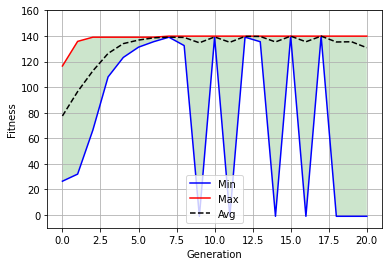

In [36]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)